In [1]:
# to do : select 3 random objects from the training set

In [2]:
import pandas as pd
from astropy.io import fits
import thecannon as tc
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
w = fits.open('./data_files/gaia_rvs_wavelength.fits')[0].data[20:-20]
training_set = pd.read_csv('./data_files/cannon_training_set.csv')
test_set = pd.read_csv('./data_files/cannon_test_set.csv')
model = tc.CannonModel.read('./cannon_models/galah_labels_5para_highSNR_cleaned.model')

training_set

,Unnamed: 0.1,Unnamed: 0,sobject_id,designation,star_id,galah_teff,galah_eteff,galah_logg,galah_elogg,galah_feh,...,ra,dec,parallax,teff_gspphot,logg_gspphot,mh_gspphot,vbroad,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,0,18,131116000501059,Gaia DR3 4667295055952796800,b'03364412-6912025',4558.4820,88.797151,4.567866,0.184315,0.159769,...,54.183935,-69.200627,9.769650,4564.5337,4.6136,0.4787,NaN,11.773416,12.398062,11.021416
1,1,111,131116000501223,Gaia DR3 4670379151708947712,b'03294290-6830179',4426.1810,79.777113,4.644742,0.182405,-0.159619,...,52.428752,-68.505034,11.703492,4570.0977,4.6694,0.1155,NaN,11.680057,12.320312,10.913151
2,2,125,131116000501248,Gaia DR3 4670462134773351552,b'03255466-6803148',4693.1890,85.378241,4.609414,0.182687,0.313396,...,51.479000,-68.053991,8.736855,4642.2550,4.5940,0.4851,NaN,11.789441,12.392495,11.054585
3,3,761,131123002502147,Gaia DR3 4676958358708623104,b'04125579-6059192',5481.3130,72.400221,4.378184,0.175658,0.039713,...,63.232434,-60.989016,4.556040,5689.7803,4.4959,0.1817,NaN,11.607832,11.963531,11.082505
4,4,2031,140111004101214,Gaia DR3 5730371484020807808,b'08584388-1607583',5787.6504,91.453003,4.114293,0.178112,-0.857721,...,134.684179,-16.131778,46.687235,5877.8105,4.2024,-1.1951,NaN,5.651815,5.936923,5.194223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,5913,316588,190225005301061,Gaia DR3 6000288291438858240,b'15141817-4455064',4887.7925,83.056515,4.577197,0.180611,0.146656,...,228.575101,-44.918585,13.933540,4793.4960,4.5395,0.0851,NaN,10.378867,10.884975,9.720602
4718,5914,316590,190225005301069,Gaia DR3 6000286264203417600,b'15140076-4500436',5896.8150,104.187553,4.259187,0.195128,0.497816,...,228.503038,-45.012271,5.876250,5934.7534,4.3274,0.3040,NaN,10.332420,10.644321,9.833400
4719,5916,316610,190225005301152,Gaia DR3 5907292830597912192,b'15100430-4434103',5832.4040,79.748383,4.278312,0.177309,0.069098,...,227.517734,-44.569622,5.350117,5706.1274,4.3245,-0.2110,NaN,10.718879,11.039301,10.234471
4720,5919,316635,190225005301197,Gaia DR3 6003387058798279040,b'15095300-4417408',5749.2480,75.762788,4.368118,0.176836,0.049827,...,227.470866,-44.294725,5.213401,5577.1370,4.3736,-0.2707,NaN,11.081675,11.418080,10.577375


In [4]:
row1 = training_set.iloc[np.argmin(np.abs(training_set.galah_teff-5700))]
row2 = training_set.iloc[np.argmin(np.abs(training_set.galah_teff-4500))]
row3 = training_set.iloc[np.argmin(np.abs(training_set.galah_teff-6200))]

In [5]:
# define stars to plot
teff1, logg1, feh1, alpha_fe1, vbroad1 = row1.galah_teff, row1.galah_logg, \
                                row1.galah_feh, row1.galah_alpha_fe, row1.galah_vbroad
teff2, logg2, feh2, alpha_fe2, vbroad2 = row2.galah_teff, row2.galah_logg, \
                                row2.galah_feh, row2.galah_alpha_fe, row2.galah_vbroad
teff3, logg3, feh3, alpha_fe3, vbroad3 = row3.galah_teff, row3.galah_logg, \
                                row3.galah_feh, row3.galah_alpha_fe, row3.galah_vbroad


c1 = 'tomato'
c2 = 'goldenrod'
c3 = 'cornflowerblue'
rcParams['font.size']=15

([<matplotlib.axis.XTick at 0x7f97842ac220>,
 [Text(0, 0, '1'), Text(1, 0, '10'), Text(2, 0, '100')])

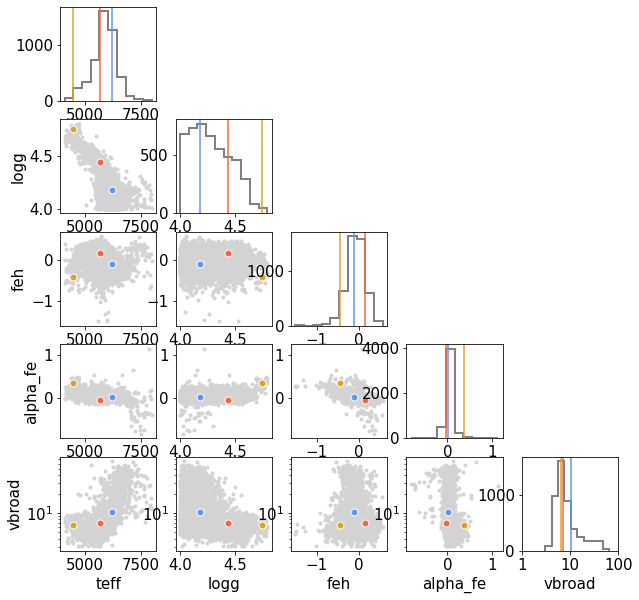

In [6]:
figure(figsize=(10,10))
subplot(5,5,1)
hist(training_set.galah_teff, histtype='step', color='grey', lw=2)
axvline(teff1, color=c1)
axvline(teff2, color=c2)
axvline(teff3, color=c3)

subplot(5,5,6);ylabel('logg')
plot(training_set.galah_teff, training_set.galah_logg, '.', color='lightgrey')
plot(teff1, logg1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, logg2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, logg3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,7)
hist(training_set.galah_logg, histtype='step', color='grey', lw=2)
axvline(logg1, color='tomato')
axvline(logg2, color='goldenrod')
axvline(logg3, color='cornflowerblue')

subplot(5,5,11);ylabel('feh')
plot(training_set.galah_teff, training_set.galah_feh, '.', color='lightgrey')
plot(teff1, feh1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, feh2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, feh3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,12)
plot(training_set.galah_logg, training_set.galah_feh, '.', color='lightgrey')
plot(logg1, feh1, color=c1, mec='w', ms=7, marker='o')
plot(logg2, feh2, color=c2, mec='w', ms=7, marker='o')
plot(logg3, feh3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,13);xlabel('feh')
hist(training_set.galah_feh, histtype='step', color='grey', lw=2)
axvline(feh1, color='tomato')
axvline(feh2, color='goldenrod')
axvline(feh3, color='cornflowerblue')

subplot(5,5,16);ylabel('alpha_fe')
plot(training_set.galah_teff, training_set.galah_alpha_fe, '.', color='lightgrey')
plot(teff1, alpha_fe1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, alpha_fe2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, alpha_fe3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,17)
plot(training_set.galah_logg, training_set.galah_alpha_fe, '.', color='lightgrey')
plot(logg1, alpha_fe1, color=c1, mec='w', ms=7, marker='o')
plot(logg2, alpha_fe2, color=c2, mec='w', ms=7, marker='o')
plot(logg3, alpha_fe3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,18)
plot(training_set.galah_feh, training_set.galah_alpha_fe, '.', color='lightgrey')
plot(feh1, alpha_fe1, color=c1, mec='w', ms=7, marker='o')
plot(feh2, alpha_fe2, color=c2, mec='w', ms=7, marker='o')
plot(feh3, alpha_fe3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,19);xlabel('alpha_fe')
hist(training_set.galah_alpha_fe, histtype='step', color='grey', lw=2)
axvline(alpha_fe1, color='tomato')
axvline(alpha_fe2, color='goldenrod')
axvline(alpha_fe3, color='cornflowerblue')

subplot(5,5,21);ylabel('vbroad');xlabel('teff');yscale('log')
plot(training_set.galah_teff, training_set.galah_vbroad, '.', color='lightgrey')
plot(teff1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,22);xlabel('logg');yscale('log')
plot(training_set.galah_logg, training_set.galah_vbroad, '.', color='lightgrey')
plot(logg1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(logg2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(logg3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,23);xlabel('feh');yscale('log')
plot(training_set.galah_feh, training_set.galah_vbroad, '.', color='lightgrey')
plot(feh1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(feh2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(feh3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,24);xlabel('alpha_fe');yscale('log')
plot(training_set.galah_alpha_fe, training_set.galah_vbroad, '.', color='lightgrey')
plot(alpha_fe1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(alpha_fe2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(alpha_fe3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,25);xlabel('vbroad')
hist(np.log10(training_set.galah_vbroad), histtype='step', color='grey', lw=2)
axvline(np.log10(vbroad1), color='tomato')
axvline(np.log10(vbroad2), color='goldenrod')
axvline(np.log10(vbroad3), color='cornflowerblue')
xticks(ticks=[0,1,2], labels=['1','10','100'])

Text(0, 0.5, 'normalized flux')

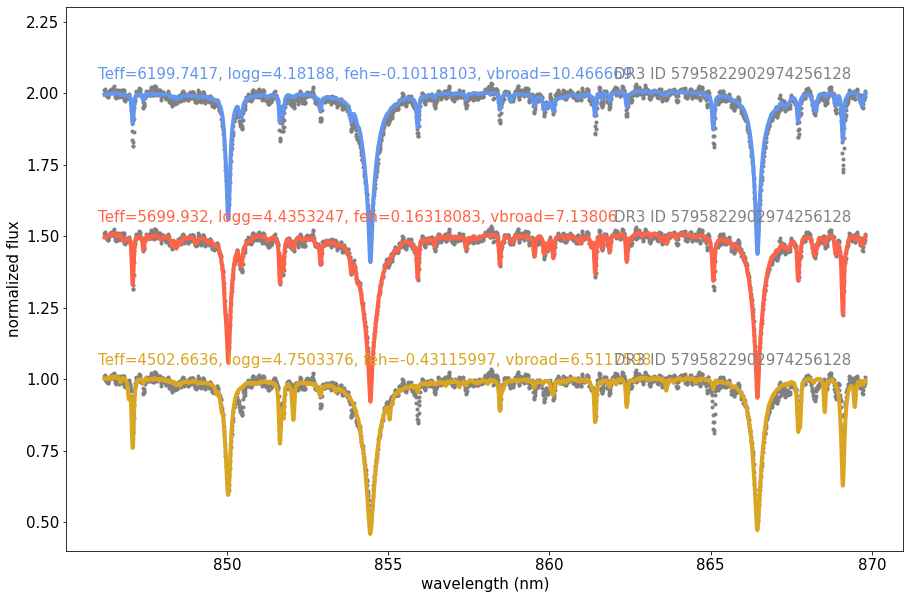

In [7]:
flux_data = pd.read_csv('./data_files/flux_data.csv')
flux_err_data = pd.read_csv('./data_files/flux_err_data.csv')
id1 = str(row1.source_id)
flux1 = flux_data[id1].to_numpy()
sigma1 = flux_err_data[id1].to_numpy()

id2 = str(row1.source_id)
flux2 = flux_data[id2].to_numpy()

id3 = str(row1.source_id)
flux3 = flux_data[id3].to_numpy()

rcParams['font.size']=15
str1 = 'Teff={}, logg={}, feh={}, vbroad={}'.format(teff1, logg1, feh1, vbroad1)
str2 = 'Teff={}, logg={}, feh={}, vbroad={}'.format(teff2, logg2, feh2, vbroad2)
str3 = 'Teff={}, logg={}, feh={}, vbroad={}'.format(teff3, logg3, feh3, vbroad3)

figure(figsize=(15,10))
plot(w, flux2[20:-20], '.', color='grey')
plot(w, model([teff2, logg2, feh2, alpha_fe2, vbroad2]), color=c2, lw=4)
plt.text(846,1.05,str2, color=c2)
text(862,1.05,'DR3 ID '+id2, color='grey')

plot(w, flux1[20:-20]+0.5, '.', color='grey')
plot(w, model([teff1, logg1, feh1, alpha_fe1, vbroad1])+0.5, color=c1, lw=4)
plt.text(846,1.55,str1, color=c1)
text(862,1.55,'DR3 ID '+id1, color='grey')

plot(w, flux3[20:-20]+1.0, '.', color='grey')
plot(w, model([teff3, logg3, feh3, alpha_fe3, vbroad3])+1.0, color=c3, lw=4)
plt.text(846,2.05,str3, color=c3)
text(862,2.05,'DR3 ID '+id3, color='grey')

ylim(0.4,2.3)
xlabel('wavelength (nm)')
ylabel('normalized flux')

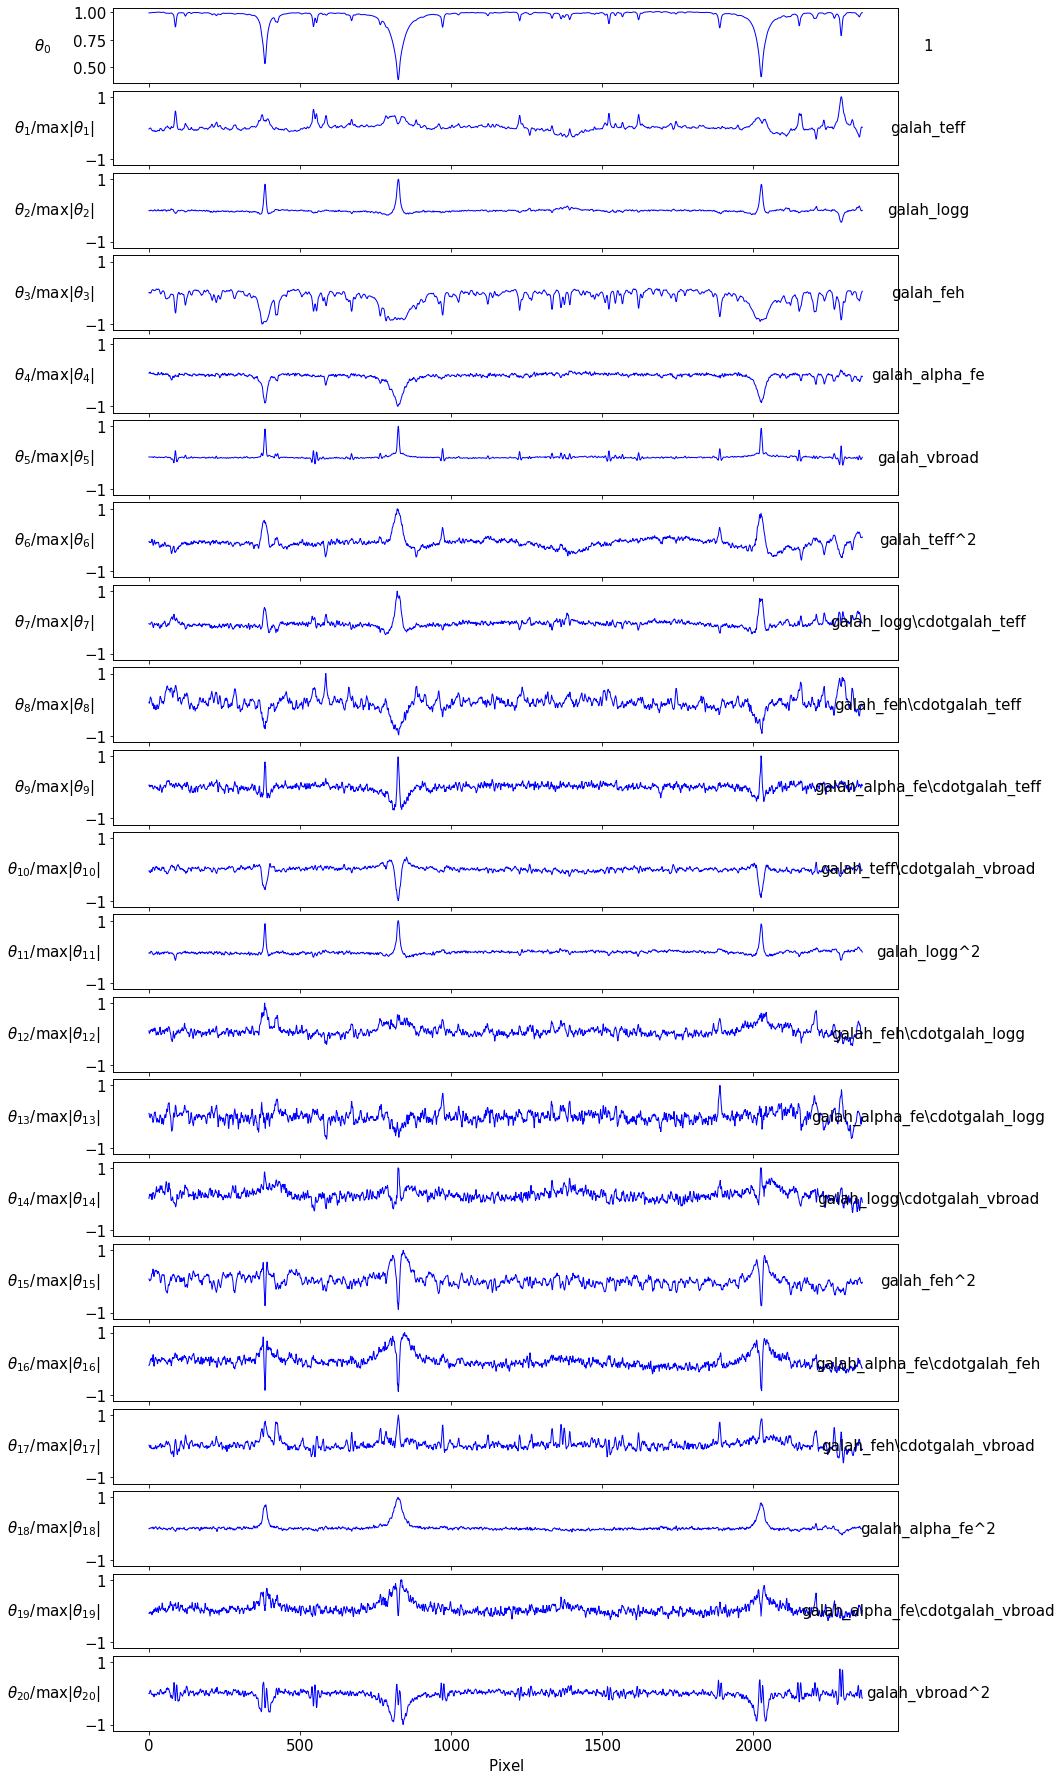

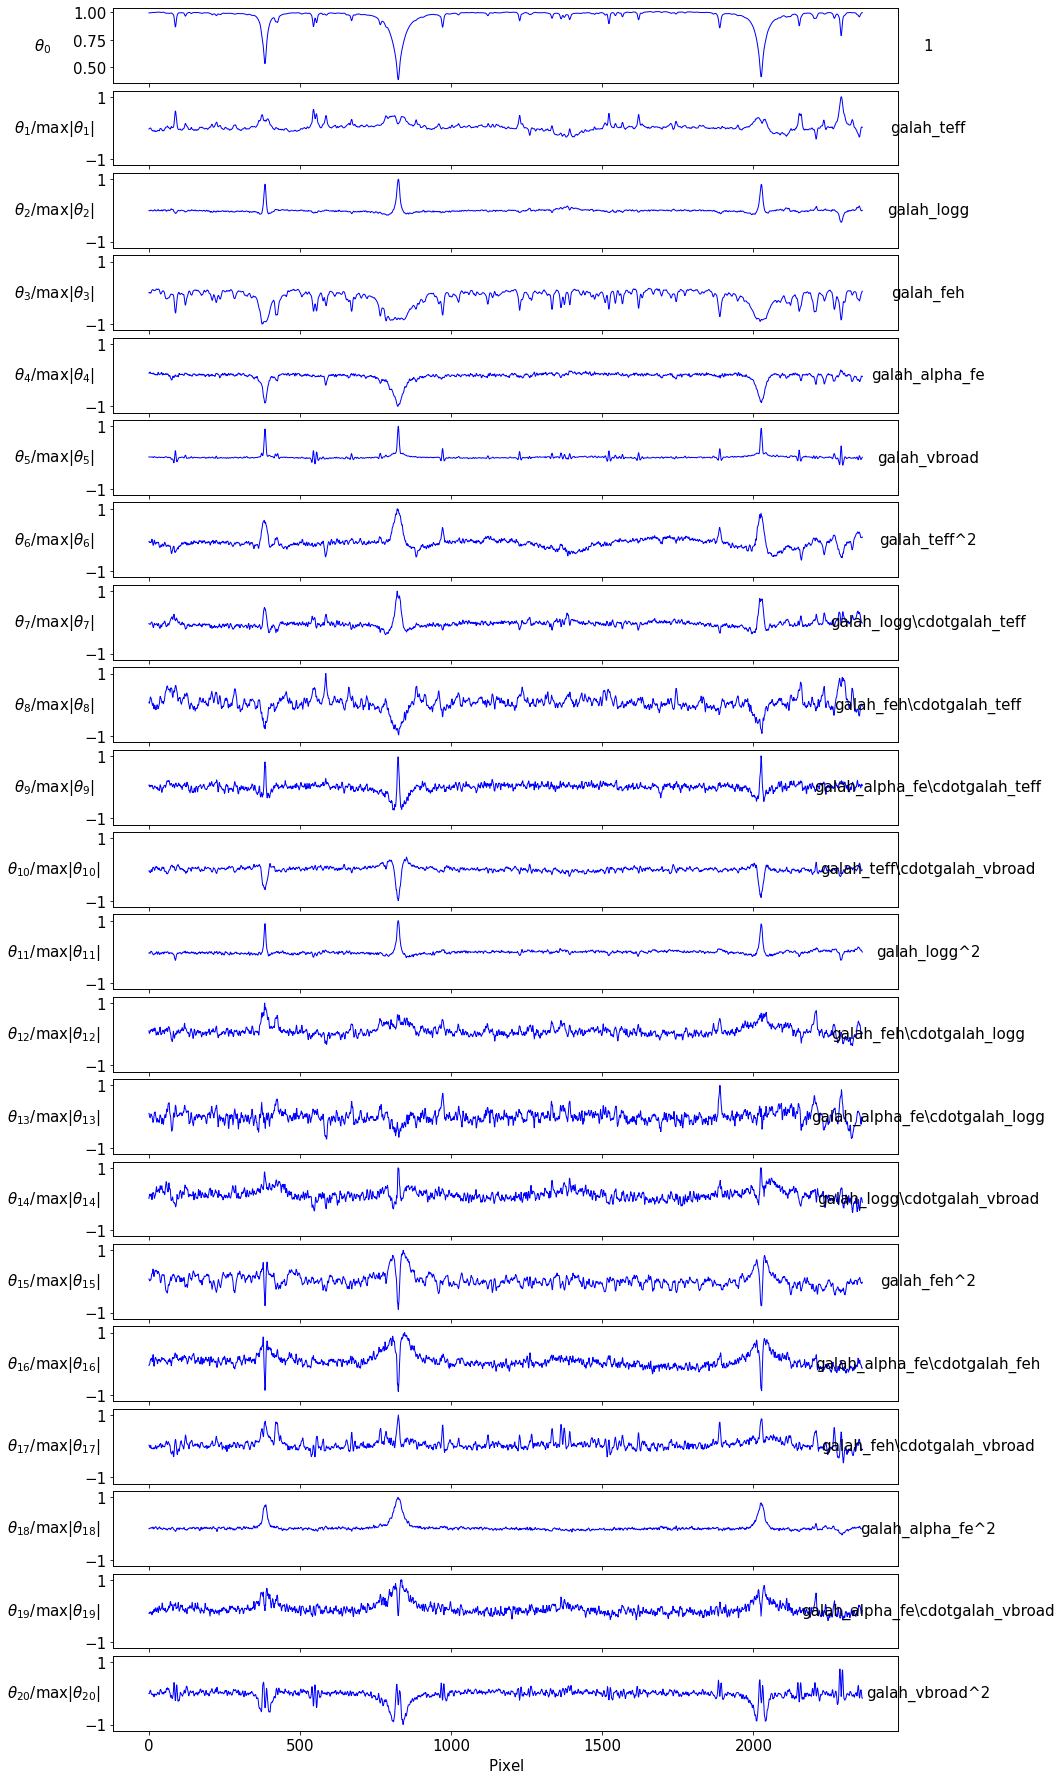

In [8]:
tc.plot.theta(model)

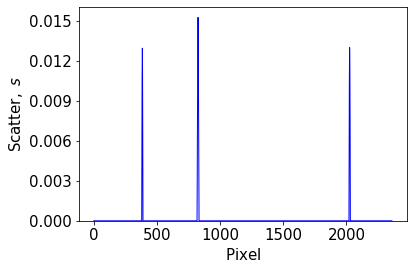

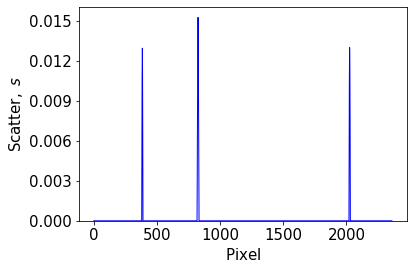

In [9]:
# maybe here I can do a little experiementing with the cannon model plots
tc.plot.scatter(model)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> c


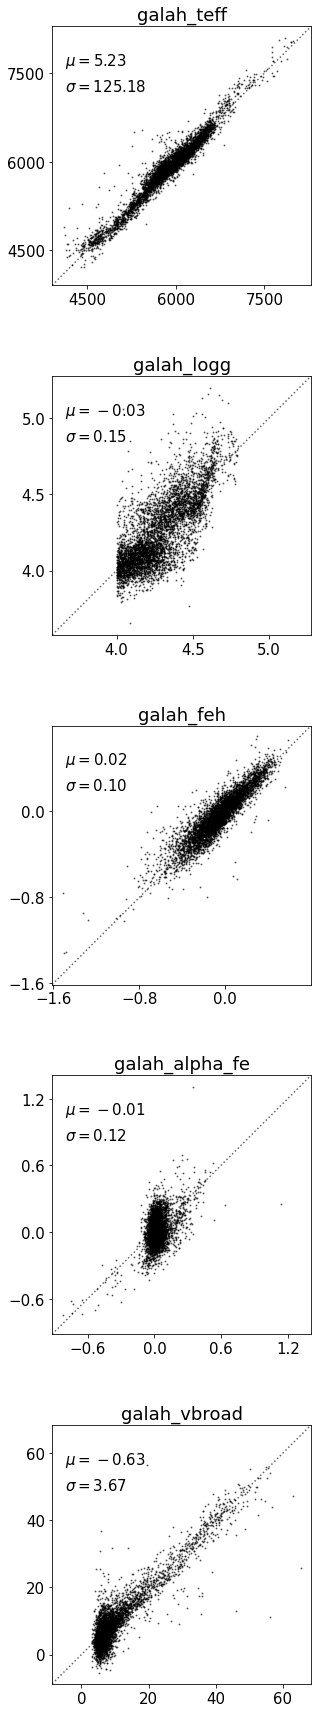

In [10]:
# next: what is this one to one plot?
df = pd.read_csv('../process_GALAH_data/GALAH_data_tables/training_set_galah_cannon_labels.csv')
arr = df[['cannon_teff','cannon_logg', 'cannon_feh', 'cannon_alpha', 'cannon_vbroad']].to_numpy()
%debug tc.plot.one_to_one(model, arr)